In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
pd.DataFrame(X)[0]

0     -0.119711
1      1.215645
2      0.779068
3      0.964594
4      0.008878
         ...   
995    0.321327
996   -0.438712
997   -0.545282
998   -0.765241
999    0.822416
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

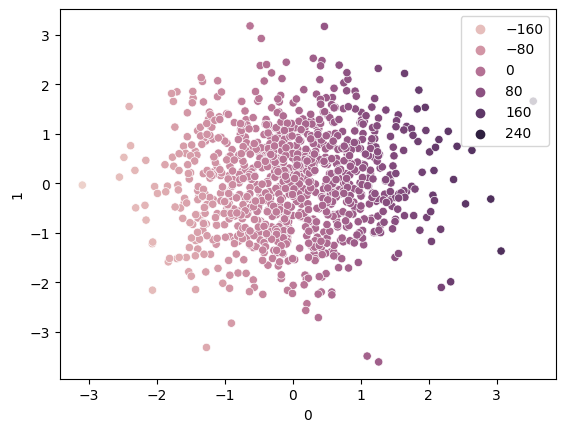

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [7]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [8]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [9]:
svr.coef_

array([[63.95127667, 10.27975705]])

In [10]:
y_pred=svr.predict(X_test)

In [11]:
y_pred

array([-4.52576096e+01, -2.87749186e+01, -1.24939199e+01,  5.74678829e+01,
       -2.15289364e+01, -9.98290521e+01, -6.64406567e+01,  6.65927212e+01,
        1.17848322e+01, -1.21286091e+02,  4.25837385e+01,  1.70254070e+00,
        1.30067503e+01,  2.80280607e+01,  1.90015713e+01,  1.72946743e+01,
        4.51011881e+01,  5.45030907e+00, -1.43980500e+02,  8.47310788e+01,
        4.52072518e+01, -1.59704710e+01,  3.35130295e+01,  3.62858030e+01,
       -4.24719973e+01, -4.54680545e+01,  3.64146675e+01, -6.72135594e+01,
       -7.33116935e-01,  2.35134583e+01, -2.91896003e+01, -1.22270424e+02,
       -1.88687121e+01,  3.10154689e+01,  3.67786156e+01, -4.85475194e+01,
        2.08094121e+01,  1.18261944e+02,  2.78039679e+01, -3.52801912e+01,
        1.15846576e+01,  5.02513395e+01, -8.82523839e+01, -6.57963736e+01,
       -1.08908966e+01, -4.15379836e+01,  7.76750607e+00, -6.72199346e+01,
       -1.55548563e+01,  4.12456341e+01,  9.16817356e+00,  9.04955186e+00,
        1.41712331e+01, -

In [12]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

0.9966869112428816

### HYPERPARAMETER TUNING

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
sklearn.svm.SVR().get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [15]:
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear','rbf'],
            'epsilon':[0.1,0.2,0.3]
           }

In [16]:
grid=GridSearchCV(SVR(),param_grid=param_grid,scoring='neg_mean_squared_error',refit=True,cv=5,verbose=3)

In [17]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-378.142 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-264.157 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-271.097 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-362.697 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-350.538 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=-3771.628 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=-2885.514 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=-3220.471 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=-3609.760 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=-3807.641 total time=   0.0s
[CV 1/5] END C=0.1, epsilon

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=3)

In [18]:
grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [19]:
y_pred=grid.predict(X_test)
r2_score(y_pred,y_test)

0.9968313227385738